<a href="https://colab.research.google.com/github/anushkagupta1307/IR2022_Project_27/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries used in the preprocessing
from bs4 import BeautifulSoup as bs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pydrive
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
#nltk library for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#function for scraping all the reviews for the provided URL

def scraping_amazon_reviews(url):

  flag=0;
  count=0;
  u=1;

  link=url
  page = requests.get(link)
  #getting content of the provided URL with HTML parser
  soup = bs(page.content,'html.parser')

  # #gettting total number of ratings from the webpage, to know from how many pages we have to fetch data 
  # total_ratings = soup.find_all("",{"data-hook":"cr-filter-info-review-rating-count"})
  # #print(total_ratings)
  # total_ratings_lstrips=total_ratings[0].get_text().lstrip('\n')
  # total_ratings_rstrips=total_ratings_lstrips.rstrip('\n')
  # total_ratings_rstrips = total_ratings_rstrips.replace(",", "")
  # result = total_ratings_rstrips.index('total ratings')

  # #print(result)

  # position=0
  # for i in range(result-2,0,-1):
  #     if total_ratings_rstrips[i]==' ':
  #       position=i
  #       break;

  # #print(position)

  # #extracted total number of reviews
  # total_ratings_final=int(total_ratings_rstrips[position+1:result-1])
  # #print(total_ratings_final)
  
  #creating empty dataframe with the mentioned columns
  df = pd.DataFrame(columns = ['Customer Name', 'Review title', 'Ratings','Reviews'])
  # u<=(total_ratings_final/10)
  while(u<=(50)):

    #populating dataframe page by page as each page contains only 10 reviews
    url=url+"&pageNumber="+str(u)
    page = requests.get(url)

    if page.status_code!=200:
      #print("breaked at",u)
      flag=1
      continue;
    
    soup = bs(page.content,'html.parser')

    #getting name of the reviewer using class id - a-profile-name 
    names = soup.find_all('span',class_='a-profile-name')
    cust_name = []
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    #popping first two names because they are for the top positve and top critical
    cust_name.pop(0)
    cust_name.pop(0)

    #collecting indexes for the repeating customer names
    indexes_to_remove=[]
    for i in range(len(cust_name)):
      
      for j in range(i+1,len(cust_name)):
        if cust_name[i]==cust_name[j]:
          #print(cust_name[i])
          indexes_to_remove.append(j)

    #storing unique entries to the list
    for i in range(len(indexes_to_remove)-1,-1,-1):
        cust_name.pop(indexes_to_remove[i])

    #fetching title of the review using the class id - review-title-content 
    title = soup.find_all('a',class_='review-title-content')
    review_title = []
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
    
    #stripping extra spaces from left and right from the title
    review_title[:] = [titles.lstrip('\n') for titles in review_title]
    review_title[:] = [titles.rstrip('\n') for titles in review_title]

    #fetching rating of the review using the class id - review-rating
    rating = soup.find_all('i',class_='review-rating')
    rate = []
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    #popping first two ratings because they are for the top positve and top critical
    rate.pop(0)
    rate.pop(0)

    #fetching review of the review using the class id - review-body
    review = soup.find_all("span",{"data-hook":"review-body"})

    review_content = []
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())

    #stripping extra spaces from left and right from the review
    review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
    review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
    #print(review_content)


    #finally storing each of the value to the created dataframe earlier
    for i in range(len(cust_name)):
      
      df=df.append({'Customer Name':cust_name[i], 'Review title':review_title[i], 'Ratings':rate[i],'Reviews':review_content[i]},ignore_index=True)

    u=u+1
    count=count+1

    #extracting rating from the string mentioned

    

  #extracting rating from the string mentioned
  extracted_ratings=[]
  for i in range(len(df)):
    for j in range(len(df['Ratings'][i])):
      if df['Ratings'][i][j]==" ":
        count=j
        break;
    #print(count)

    #print(df_sorted_price['overall rating'][i][:count])
    extracted_ratings.append(float(df['Ratings'][i][:count]))

  df=df.drop(['Ratings'], axis = 1)

  df['Ratings']=extracted_ratings

  ecommerce_website=[]
  for i in range(len(df)):
    ecommerce_website.append("Amazon")

  df['Ecommerce Website']=ecommerce_website

  #print(df)
  return df;


In [ ]:
df_amazon=scraping_amazon_reviews("https://www.amazon.in/Samsung-Galaxy-M12-Storage-Processor/product-reviews/B08XGDN3TZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")

In [ ]:
df_amazon

,Customer Name,Review title,Reviews,Ratings,Ecommerce Website
0,True Advisor,Horrible product,Very disappointed with the overall performance...,1.0,Amazon
1,Pavan Kumar,Overall,"Got the mobile on the launch date,Battery must...",4.0,Amazon
2,Naresh kumar sharma,Camera quality is not like 48 megapixel,Camera quality is low,3.0,Amazon
3,JT,A big no from me,1. It doesn't work with 5.0GHz WiFi frequency....,1.0,Amazon
4,Suman Basu,Put your money somewhere else,"Not worth buying....faulty software, poor disp...",1.0,Amazon
...,...,...,...,...,...
495,Aviraj,Worst samsung mobile ever,This is worst samsung mobile I have seen from ...,1.0,Amazon
496,Jyoti,Too much lagging and slow,I will never purchase Samsung phones. Phone is...,1.0,Amazon
497,Amazon Customer,कैसा दिखाते है उसका 10 % भी नही,मोबाइल का कैमरा बिल्कुल भी सही नही है 48 PM बत...,1.0,Amazon
498,Bosky,Slow performance,The phone hangs a lot and is very slow. I rece...,1.0,Amazon


In [ ]:
#funcction for scraping flipkart reviews
def scraping_flipkart_reviews(url):

  flag=0;
  count=0;
  u=1;

  #requesting connection from URL and getting content using HTML parser
  # page = requests.get(url)
  # soup = bs(page.content,'html.parser')

  # #getting total numnber of ratings on the product
  # total_ratings = soup.find_all('',class_='row _2afbiS')
  # #print(total_ratings)
  # #total_ratings[1].get_text()

  # number_of_reviews=total_ratings[1].get_text()
  # number_of_reviews = number_of_reviews.replace(",", "")
  # break_point=0


  # for i in range(len(number_of_reviews)):
  #   if number_of_reviews[i]==' ':
  #     break_point=i
  #     break;

    
  # #extracting integer part from the total ratings for getting number of pages we have to iterate
  # number_of_review_pages=int(number_of_reviews[:break_point])


  #initializing empty dataframe with the mentioned columns
  df = pd.DataFrame(columns = ['Customer Name', 'Review title', 'Ratings','Reviews'])
  #(number_of_review_pages/10)
  while(u<=(10)):
    url=url+"&page="+str(u)
    page = requests.get(url)


    if page.status_code!=200:
      #print("breaked at",u)
      flag=1
      continue;
    
    soup = bs(page.content,'html.parser')

    #fetching name of the reviewers using class - _2sc7ZR _2V5EHH
    names = soup.find_all('',class_='_2sc7ZR _2V5EHH')
    cust_name = []
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    if len(cust_name)<10:
      for i in range(len(cust_name),10,1):
        cust_name.append('anonymous')


    #fetching title of the review using class - _2-N8zT
    title = soup.find_all('',class_='_2-N8zT')
    review_title = []
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
    
    if len(review_title)<10:
      for i in range(len(review_title),10,1):
        review_title.append('NA')
  
    
    #fetching rating of the review using class - _3LWZlK _1BLPMq
    rating = soup.find_all('',class_='_3LWZlK _1BLPMq')
    rate = []
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    if len(rate)<10:
      for i in range(len(rate),10,1):
        rate.append('NA')

   
    #fetching rating of the review using class - t-ZTKy
    review = soup.find_all('',class_='t-ZTKy')

    review_content = []
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())

    
    if len(review_content)<10:
      for i in range(len(review_content),10,1):
        review_content.append('NA')

    # print(len(cust_name))
    # print(len(review_title))
    # print(len(rate))
    # print(len(review_content))

    #appending all extracted information to the earlier created dataframe
    for i in range(len(cust_name)):
      df=df.append({'Customer Name':cust_name[i], 'Review title':review_title[i], 'Ratings':rate[i],'Reviews':review_content[i]},ignore_index=True)

    u=u+1
    count=count+1

  #Append the ecommerce from which review is fetched in the dataframe
  ecommerce_website=[]
  for i in range(len(df)):
    ecommerce_website.append("Flipkart")
  df['Ecommerce Website']=ecommerce_website

  #print(df)
  return df;


In [ ]:
#Get the reviews on iPhone 13
df=scraping_flipkart_reviews("https://www.flipkart.com/samsung-galaxy-m12-blue-64-gb/product-reviews/itm062b6548d8904?pid=MOBGFG8GCPEGKGF4&lid=LSTMOBGFG8GCPEGKGF4WKWXMR&marketplace=FLIPKART")

In [ ]:
df

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website
0,Nashva Navshad,Awesome,5,This phone is really a nice product.Smooth and...,Flipkart
1,Ajith A,Great product,5,Best fine for this budget front camera should ...,Flipkart
2,Ayeza Khan,Worst experience ever!,5,Galaxy m12 display not good TFT penal very bad...,Flipkart
3,Anand Raj,Fabulous!,4,Nice and descent phone in affordable price ve...,Flipkart
4,Flipkart Customer,Worth the money,4,thanks to flipkart and delivery boy I got deli...,Flipkart
...,...,...,...,...,...
855,anonymous,NA,NA,NA,Flipkart
856,anonymous,NA,NA,NA,Flipkart
857,anonymous,NA,NA,NA,Flipkart
858,anonymous,NA,NA,NA,Flipkart


In [ ]:
def combining_two_reviews(df_flipkart,df_amazon):
  frames=[df_flipkart, df_amazon]
  result=pd.concat(frames)
  result.reset_index(drop=True, inplace=True)

  #cleaning data - by collecting indexes where rating is not present there
  list_of_indexes_of_rows_to_remove=[]
  for i in range(len(result)):
    if "NA" in str(result["Ratings"][i]):
      list_of_indexes_of_rows_to_remove.append(i)

  result.drop(list_of_indexes_of_rows_to_remove, axis=0, inplace=True)
  result.reset_index(drop=True, inplace=True)
  #Converting the ratings to float values
  for i in range(len(result)):
    result['Ratings'][i]=float(result['Ratings'][i])

  result.reset_index(drop=True, inplace=True)

  #Store the length of reviews in a list
  review_length=[]
  for i in range(len(result)):
    temp_length=len(result['Reviews'][i])
    review_length.append(temp_length)

  #Append length of reviews in the dataframe
  result['length of review']=review_length

  return result;




In [ ]:
result=combining_two_reviews(df,df_amazon)

In [ ]:
result

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review
0,Nashva Navshad,Awesome,5.0,This phone is really a nice product.Smooth and...,Flipkart,284
1,Ajith A,Great product,5.0,Best fine for this budget front camera should ...,Flipkart,179
2,Ayeza Khan,Worst experience ever!,5.0,Galaxy m12 display not good TFT penal very bad...,Flipkart,157
3,Anand Raj,Fabulous!,4.0,Nice and descent phone in affordable price ve...,Flipkart,75
4,Flipkart Customer,Worth the money,4.0,thanks to flipkart and delivery boy I got deli...,Flipkart,173
...,...,...,...,...,...,...
2708,Aviraj,Worst samsung mobile ever,1.0,This is worst samsung mobile I have seen from ...,Amazon,179
2709,Jyoti,Too much lagging and slow,1.0,I will never purchase Samsung phones. Phone is...,Amazon,102
2710,Amazon Customer,कैसा दिखाते है उसका 10 % भी नही,1.0,मोबाइल का कैमरा बिल्कुल भी सही नही है 48 PM बत...,Amazon,135
2711,Bosky,Slow performance,1.0,The phone hangs a lot and is very slow. I rece...,Amazon,88


In [ ]:
def plotting_graphs(result):
  sns.set_style(style='whitegrid')

  fig, ax = plt.subplots(figsize = (14,8))
  sns.boxplot(result['Ratings'], result['length of review'])
  plt.ylim(-20, 2000)

  fig, ax = plt.subplots(figsize = (14,8))
  result.groupby('Ratings').size().plot(kind='bar', color="grey",alpha=0.7)
  plt.xlabel('Ratings')
  plt.ylabel('Number of Ratings')
  plt.title('Combined Reviews')

  #Create an Empty dictionary with features like battery, ram, display, heat, price, processor, 
  #camera etc to store the number of reviews containing these features
  term_count_dictionary={ps.stem("battery"):0, ps.stem("ram"):0, ps.stem("display"):0,ps.stem("heat"):0, ps.stem("design"):0, ps.stem("quality"):0, ps.stem("price"):0, ps.stem("processor"):0, ps.stem("memory"):0, ps.stem("camera"):0, ps.stem("performance"):0, ps.stem("touch"):0}


  for i in range(len(result)):
      temp_review=result['Reviews'][i]
      #coverting review to lowercase
      temp_review = temp_review.lower()
      #remving any digit present in the review
      temp_review = re.sub(r'\d+','',temp_review)
      #remove extra whitespaces present 
      temp_review = re.sub(r'[^\w\s]','', temp_review)
      #removing speacial characters
      temp_review= re.sub('[@_!#$%^&*()<>?/\|}{~:]','',temp_review)
      #stripping extra spaces on left and right
      temp_review = temp_review.strip()
      #removing all the stopwords present in the review
      temp_review = remove_stopwords(temp_review)
      words = word_tokenize(temp_review)

      #If the word exists in the review, increment the count in the dictionary by 1
      for word in words:
        if ps.stem(word) in term_count_dictionary:
          term_count_dictionary[ps.stem(word)]=term_count_dictionary[ps.stem(word)]+1

  #Plot the features vs the number of reviews which contain those features
  features = list(term_count_dictionary.keys())
  feature_count = list(term_count_dictionary.values())
  fig = plt.figure(figsize = (16, 8))
  plt.bar(features, feature_count, color ='grey',width = 0.4)
  plt.xlabel("Fetaures")
  plt.ylabel("Count of Features")
  plt.title("Features v/s Count of feature")
  plt.show()






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


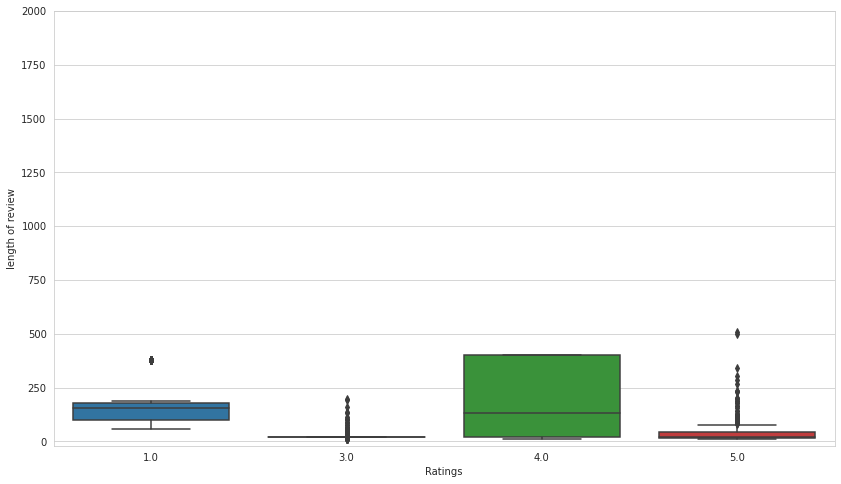

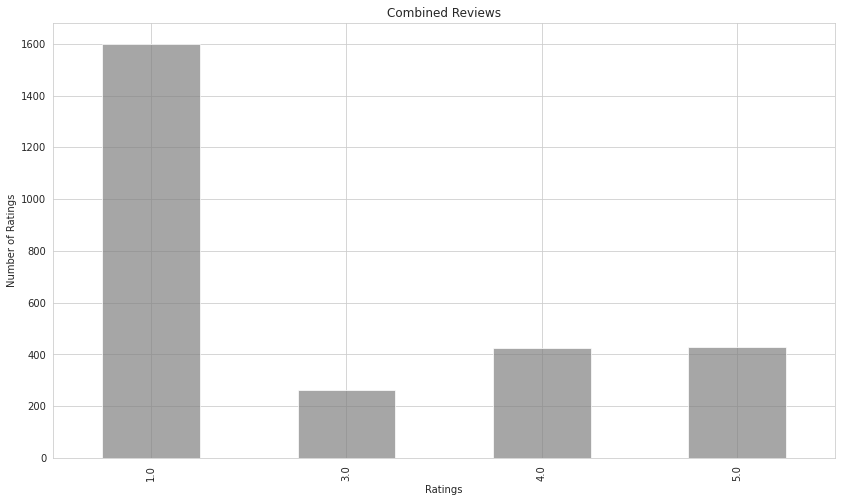

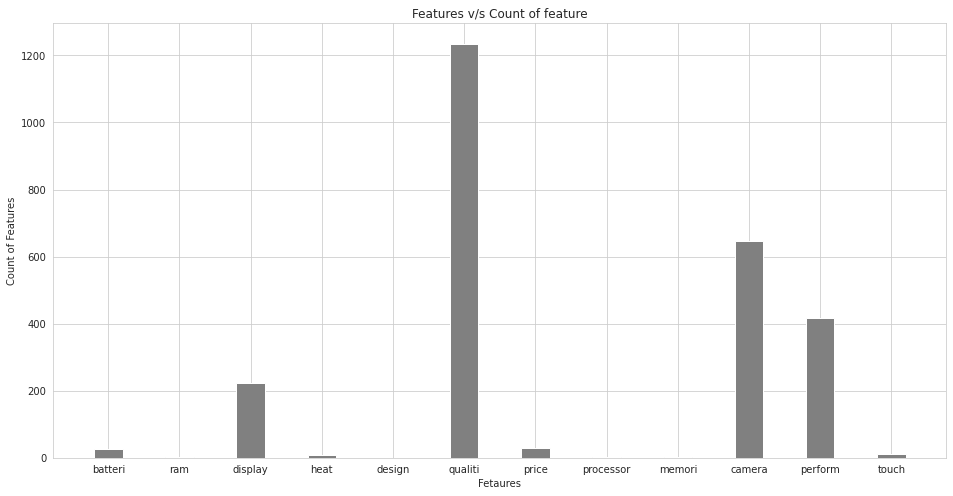

In [ ]:
plotting_graphs(result)

In [ ]:
def extracting_relevant_amazon_info(URL):
  #header user for establising connection from the browser
	HEADERS = ({'User-Agent':'Mozilla/5.0 (Linux; ; )AppleWebKit/(KHTML, like Gecko) Chrome/Safari'})

	#getting content of the webpage of the URL
	webpage = requests.get(URL, headers=HEADERS)
	soup = BeautifulSoup(webpage.content, "lxml")
	input_dictionary={}
 
  #fetching product title from the webpage using the id - productTitle and if not present then, NA is written instead
	try:
		title = soup.find("span",attrs={"id": 'productTitle'})
		title_value = title.string
		title_string = title_value.strip().replace(',', '')

	except AttributeError:
		title_string = "NA"

	input_dictionary['product title']=title_string

	#fetching price from the webpage using the id - a-offscreen and if not present then, NA is written instead
	try:
		price = float(soup.find("span", attrs={'class': 'a-offscreen'}).string.strip().replace('₹', '').replace(',',''))
	except AttributeError:
		price = "NA"

	input_dictionary['product price']=price

	#fetching rating from the webpage using the id - a-icon a-icon-star a-star-4-5 and if not present then, NA is written instead
	try:
		rating = soup.find("i", attrs={'class': 'a-icon a-icon-star a-star-4-5'}).string.strip().replace(',', '')

	except AttributeError:
		try:
			rating = soup.find("span", attrs={'class': 'a-icon-alt'}).string.strip().replace(',', '')
		except:
			rating = "NA"

	input_dictionary['overall rating']=rating
	
	#fetching review count from the webpage using the id - acrCustomerReviewText and if not present then, NA is written instead
	try:
		review_count = soup.find(
			"span", attrs={'id': 'acrCustomerReviewText'}).string.strip().replace(',', '')

	except AttributeError:
		review_count = "NA"

	input_dictionary['total reviews']=review_count

	#fetching availability from the webpage using the id - availability and if not present then, NA is written instead
	try:
		available = soup.find("div", attrs={'id': 'availability'})
		available = available.find("span").string.strip().replace(',', '')

	except AttributeError:
		available = "NA"

	input_dictionary['Availability']=available

	#dictionary contains column name as key and their corresponding value as the value in dictonary
	data_list = []
	data_list.append(input_dictionary)
	df = pd.DataFrame(data_list)
	df['Website']=['Amazon']
	df['overall rating'][0]=float(df['overall rating'][0][:3])
 

	return df; 

In [ ]:
URL="https://www.amazon.in/Samsung-Galaxy-M12-Storage-Processor/dp/B08XGDN3TZ/ref=cm_cr_arp_d_product_top?ie=UTF8"
df_extracting_amazon_relevant=extracting_relevant_amazon_info(URL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_extracting_amazon_relevant

,product title,product price,overall rating,total reviews,Availability,Website
0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,10499.0,4.1,136288 ratings,In stock.,Amazon


In [ ]:
#using the Product URL, we fetch the Name, Price, Availability, Rating and the Number of Total reviews on that product
def checking_relevant_info_flipkart(URL):
  feature_dictionary=dict()

  page = requests.get(URL)
  soup = bs(page.content,'html.parser')
  price = soup.find_all('',class_='_30jeq3 _16Jk6d')
  print(price[0].get_text()[1:].replace(',',''))

  feature_dictionary['product price']=price[0].get_text()[1:].replace(',','')


  #B_NuCI

  title = soup.find_all('',class_='B_NuCI')
  print(title[0].get_text())

  feature_dictionary['product title']=title[0].get_text()


  #_3LWZlK

  rating = soup.find_all('',class_='_3LWZlK')
  print(rating[0].get_text())
  feature_dictionary['overall rating']=rating[0].get_text()

  #_2_R_DZ

  reviews = soup.find_all('',class_='_2_R_DZ')
  print(reviews[0].get_text().split(' ')[1].replace('\xa0',' ').split(' ')[2])

  feature_dictionary['total reviews']=reviews[0].get_text().split(' ')[1].replace('\xa0',' ').split(' ')[2]

  


  buying_button = soup.find_all('',class_='_2KpZ6l _2U9uOA ihZ75k _3AWRsL')
  #print(str(buying_button))
  if "disabled" not in str(buying_button[0]):
    print("In stock.")
    feature_dictionary['Availability']="In stock."

  else:
    print("Out of stock.")
    feature_dictionary['Availability']="Out of stock."

 
  feature_dictionary['Website']='Flipkart'
  list_flipkart=[]
  list_flipkart.append(feature_dictionary)
  df_flipkart = pd.DataFrame(list_flipkart)


  return df_flipkart



In [ ]:
URL="https://www.flipkart.com/samsung-galaxy-m12-black-64-gb/p/itm425898eedc4ce?pid=MOBGFG8H4A32HTKJ&lid=LSTMOBGFG8H4A32HTKJLY04MH&marketplace=FLIPKART&q=samsung+m12&store=tyy%2F4io&srno=s_1_1&otracker=AS_QueryStore_OrganicAutoSuggest_1_11_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_11_na_na_na&fm=search-autosuggest&iid=dce5a560-f9cc-4d74-9d86-ba6473f389f0.MOBGFG8H4A32HTKJ.SEARCH&ppt=hp&ppn=homepage&ssid=tfi3aci2k00000001649931829739&qH=3b5e7c09ced4cfe6"
df_relevant_info_flipkart=checking_relevant_info_flipkart(URL)

10382
SAMSUNG Galaxy M12 (Black, 64 GB)  (4 GB RAM)
4.2
860
In stock.


In [ ]:
df_relevant_info_flipkart

,product price,product title,overall rating,total reviews,Availability,Website
0,10382,"SAMSUNG Galaxy M12 (Black, 64 GB) (4 GB RAM)",4.2,860,In stock.,Flipkart


In [ ]:
#combined the dataframe for Amazon and Flipkart of the same product into a single dataframe and 
#Appended a column which specifies the website name and product id. 
def combine_relevant_info(df_amazon,df_flipkart):
  df_concatenated = pd.concat([df_amazon, df_flipkart], ignore_index = True)
  df_concatenated.reset_index()

  for i in range(len(df_concatenated)):
    df_concatenated['total reviews'][i]=df_concatenated['total reviews'][i].replace(',','')

  for i in range(len(df_concatenated)):
    for j in range(len(df_concatenated['total reviews'][i])):
      flag=0
      if df_concatenated['total reviews'][i][j]==' ':
        flag=1
        count=j
        break;
    
    if flag==1:
      df_concatenated['total reviews'][i]=df_concatenated['total reviews'][i][:count]

  for i in range(len(df_concatenated)):
    df_concatenated['total reviews'][i]=int(df_concatenated['total reviews'][i])
    df_concatenated['product price'][i]=float(df_concatenated['product price'][i])
  
  return df_concatenated;


In [ ]:
df_concatenated=combine_relevant_info(df_extracting_amazon_relevant,df_relevant_info_flipkart)

In [ ]:
df_concatenated

,product title,product price,overall rating,total reviews,Availability,Website
0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,10499.0,4.1,136288,In stock.,Amazon
1,"SAMSUNG Galaxy M12 (Black, 64 GB) (4 GB RAM)",10382.0,4.2,860,In stock.,Flipkart


In [ ]:
df_concatenated.columns

Index(['product title', 'product price', 'overall rating', 'total reviews',
       'Availability', 'Website'],
      dtype='object')

In [ ]:
result.columns
df_concatenated.columns

Index(['Customer Name', 'Review title', 'Ratings', 'Reviews',
       'Ecommerce Website', 'length of review'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory='/content/drive/MyDrive/URLS'
for filename in os.scandir(directory):
  print(filename)
  # file=open(filename,"r")
  # url_lists=[]
  # for links in file.readlines():
  #   url_lists.append(links)
  
  # print(url_lists)
  # print()
  # print()
  # print()

<DirEntry 'redmi10prime.txt'>
<DirEntry 'redminote10s.txt'>
<DirEntry '.DS_Store'>
<DirEntry 'samsungm32.txt'>
<DirEntry 'samsungm12.txt'>


In [ ]:
#created empty dataframe with mentioned columns and for storing review info for the particular review 
df_reviews = pd.DataFrame(columns=['Customer Name','Review title','Ratings','Reviews','Ecommerce Website','length of review','id_of_phone'])
df_reviews

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone


In [ ]:
#created empty dataframe with mentioned columns and for storing relevant info for the product
df_product=pd.DataFrame(columns=['product title','product price','overall rating','total reviews','Availability', 'Website','id_of_phone'])
df_product

,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone


In [ ]:
#reading and appending each of the filename in list of lists 
list_of_lists=[]
for filename in os.scandir(directory):
  if filename.is_file():
    file=open(filename,"r")
    if ".txt" in str(filename):
      list_of_lists.append(file.readlines())
      #print(file.readlines())

In [ ]:
list_of_lists

[['https://www.amazon.in/Redmi-10-Prime-extendable-Adaptive/dp/B09CTZK1V9/ref=sr_1_1?crid=34S1WOXXS2ET7&keywords=phone%2B10&qid=1649946376&sprefix=phone%2B10%2Caps%2C228&sr=8-1&th=1\n',
  'https://www.flipkart.com/redmi-10-prime-bifrost-blue-128-gb/p/itm9377b4c936baa?pid=MOBG6PB47FHHGTZN&lid=LSTMOBG6PB47FHHGTZNXR1BIA&marketplace=FLIPKART&q=redmi+10+prime+128+gb&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=d0956990-6311-415c-b1ae-5179fb70459b.MOBG6PB47FHHGTZN.SEARCH&ppt=sp&ppn=sp&ssid=a7tpj52wjk0000001649946497475&qH=9e7772a5d27057ed\n',
  'https://www.amazon.in/Redmi-10-Prime-extendable-Adaptive/product-reviews/B09CTZK1V9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews\n',
  'https://www.flipkart.com/redmi-10-prime-bifrost-blue-128-gb/product-reviews/itm9377b4c936baa?pid=MOBG6PB47FHHGTZN&lid=LSTMOBG6PB47FHHGTZNCRHGVR&marketplace=FLIPKART'],
 ['https://www.amazon.in/Redmi-Storage-Super-Amoled-Display/dp/B0948NNY3W/ref=sr_1_3?crid=3GPZ2K1PXCJL4&k

In [ ]:
mobile_id_file_mapping=dict()

In [ ]:
#porgram for getting all the review information from amazon with mentioned column names
count=0
for i in range(len(list_of_lists)):
      df_amazon_1=scraping_amazon_reviews(list_of_lists[i][2])
      print(df_amazon_1)

      id_of_phone=[]
      for i in range(len(df_amazon_1)):
        id_of_phone.append(count)
      
      df_amazon_1['id_of_phone']=id_of_phone
      df_temp = pd.DataFrame(columns=['Customer Name','Review title','Ratings','Reviews','Ecommerce Website','length of review','id_of_phone'])
      df_concat_1=combining_two_reviews(df_temp,df_amazon_1)
      frames = [df_reviews, df_concat_1]
      df_reviews = pd.concat(frames)


      count=count+1
      print(count)


KeyboardInterrupt: ignored

In [ ]:
df_reviews

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone
0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,Don't buy this phone,Amazon,20,0
1,vedavyas madutha,Front camara,1.0,Front camara worrest,Amazon,20,0
2,Santy meena,Smart looking,4.0,,Amazon,0,0
3,Khushi,Camera is really poor. Will never suggest anyo...,1.0,,Amazon,0,0
4,Pavan,Over priced mobile with cheap configuration,1.0,"Got an a used device, and camera is horrible, ...",Amazon,116,0
...,...,...,...,...,...,...,...
495,Aviraj,Worst samsung mobile ever,1.0,This is worst samsung mobile I have seen from ...,Amazon,179,3
496,Jyoti,Too much lagging and slow,1.0,I will never purchase Samsung phones. Phone is...,Amazon,102,3
497,Amazon Customer,कैसा दिखाते है उसका 10 % भी नही,1.0,मोबाइल का कैमरा बिल्कुल भी सही नही है 48 PM बत...,Amazon,135,3
498,Bosky,Slow performance,1.0,The phone hangs a lot and is very slow. I rece...,Amazon,88,3


In [ ]:
#program for getting all the review information from flipkart with mentioned column names
count=0
for i in range(len(list_of_lists)):
      df_flipkart_1=scraping_flipkart_reviews(list_of_lists[i][3])

      id_of_phone=[]
      for i in range(len(df_flipkart_1)):
        id_of_phone.append(count)
      df_flipkart_1['id_of_phone']=id_of_phone
      df_temp = pd.DataFrame(columns=['Customer Name','Review title','Ratings','Reviews','Ecommerce Website','length of review','id_of_phone'])
      
      df_concat_1=combining_two_reviews(df_temp,df_flipkart_1)
      frames = [df_reviews, df_concat_1]
      df_reviews = pd.concat(frames)

      count=count+1
      print(count)


KeyboardInterrupt: ignored

In [ ]:
df_reviews

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone


In [ ]:
df_reviews.reset_index(drop=True, inplace=True)

In [ ]:
df_reviews

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


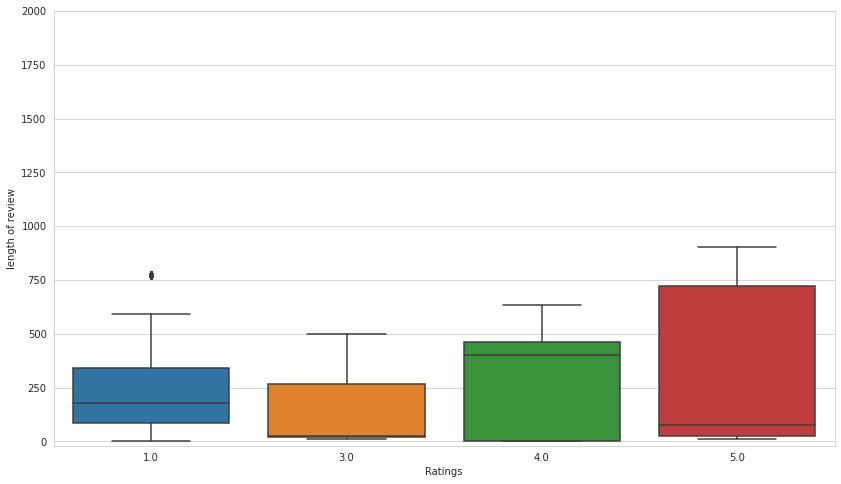

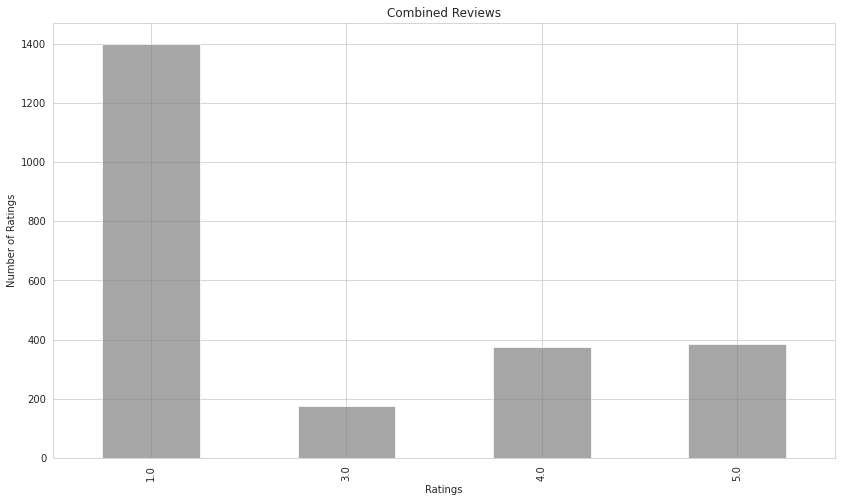

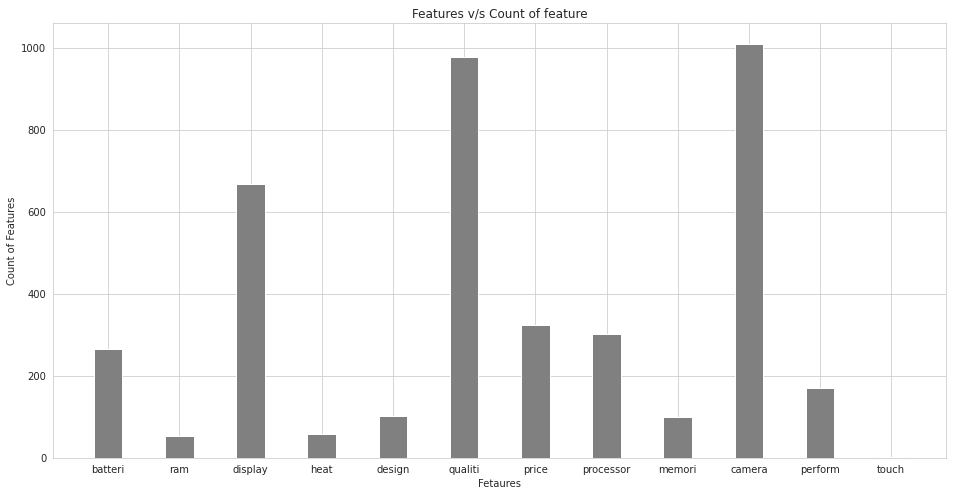

In [ ]:
#plotting all graphs for the all conactenated graph
plotting_graphs(df_reviews)

In [ ]:
#program for getting all the reviews from amazon with mentioned column names
count=0
for i in range(len(list_of_lists)):
      df_amazon_2=extracting_relevant_amazon_info(list_of_lists[i][0])
      id_of_phone=[]
      for i in range(len(df_amazon_2)):
        id_of_phone.append(count)
      df_amazon_2['id_of_phone']=id_of_phone
      df_temp=pd.DataFrame(columns=['product title','product price','overall rating','total reviews','Availability', 'Website','id_of_phone'])

      #df_temp = pd.DataFrame(columns=['Customer Name','Review title','Ratings','Reviews','Ecommerce Website','length of review','id_of_phone'])
      
      # df_concat_1=combining_two_reviews(df_temp,df_flipkart_1)
      # frames = [df_reviews, df_concat_1]
      # df_reviews = pd.concat(frames)

      df_concat_2=combine_relevant_info(df_temp,df_amazon_2)

      frames = [df_product, df_concat_2]
      df_product = pd.concat(frames)

      count=count+1
      print(count)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to

1
2
3
4


In [ ]:
df_product

,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone


In [ ]:
#program for getting all the reviews from flipkart with mentioned column names
count=0
for i in range(len(list_of_lists)):
      df_flipkart_2=checking_relevant_info_flipkart(list_of_lists[i][1])

      id_of_phone=[]
      for i in range(len(df_flipkart_2)):
        id_of_phone.append(count)
      df_flipkart_2['id_of_phone']=id_of_phone

      df_temp=pd.DataFrame(columns=['product title','product price','overall rating','total reviews','Availability', 'Website','id_of_phone'])

      #df_temp = pd.DataFrame(columns=['Customer Name','Review title','Ratings','Reviews','Ecommerce Website','length of review','id_of_phone'])
      
      # df_concat_1=combining_two_reviews(df_temp,df_flipkart_1)
      # frames = [df_reviews, df_concat_1]
      # df_reviews = pd.concat(frames)

      df_concat_2=combine_relevant_info(df_temp,df_flipkart_2)

      frames = [df_product, df_concat_2]
      df_product = pd.concat(frames)

      count=count+1
      print(count)


14580
REDMI 10 Prime (Bifrost Blue, 128 GB)  (6 GB RAM)
4.2
199
In stock.
1
13999
REDMI Note 10S (Deep Sea Blue, 64 GB)  (6 GB RAM)
4.3
1,461
In stock.
2
15636
SAMSUNG Galaxy M32 (Black, 128 GB)  (6 GB RAM)
4.3
113
In stock.
3
10799
SAMSUNG Galaxy M12 (Black, 64 GB)  (4 GB RAM)
4.2
862
In stock.
4


In [ ]:
df_product

,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone
0,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,14499.0,4.1,37056,In stock.,Amazon,0
0,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,12999.0,4.2,60807,In stock.,Amazon,1
0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,14999.0,4.1,35144,In stock.,Amazon,2
0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,10499.0,4.1,136333,In stock.,Amazon,3
0,"REDMI 10 Prime (Bifrost Blue, 128 GB) (6 GB RAM)",14580.0,4.2,199,In stock.,Flipkart,0
0,"REDMI Note 10S (Deep Sea Blue, 64 GB) (6 GB RAM)",13999.0,4.3,1461,In stock.,Flipkart,1
0,"SAMSUNG Galaxy M32 (Black, 128 GB) (6 GB RAM)",15636.0,4.3,113,In stock.,Flipkart,2
0,"SAMSUNG Galaxy M12 (Black, 64 GB) (4 GB RAM)",10799.0,4.2,862,In stock.,Flipkart,3


In [ ]:
df_reviews

,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone
0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,Don't buy this phone,Amazon,20,0
1,vedavyas madutha,Front camara,1.0,Front camara worrest,Amazon,20,0
2,Santy meena,Smart looking,4.0,,Amazon,0,0
3,Khushi,Camera is really poor. Will never suggest anyo...,1.0,,Amazon,0,0
4,Pavan,Over priced mobile with cheap configuration,1.0,"Got an a used device, and camera is horrible, ...",Amazon,116,0
...,...,...,...,...,...,...,...
2329,bikash kumar,Nice,4.0,Just okREAD MORE,Flipkart,16,3
2330,Hareesha A v,Delightful,5.0,It's good and performance is very well 🙂READ MORE,Flipkart,49,3
2331,Champak Mahant,Wonderful,5.0,Best in priceREAD MORE,Flipkart,22,3
2332,Abhishek Shukla,Worth every penny,4.0,Very good Phone at this rangeREAD MORE,Flipkart,38,3


In [ ]:
df_reviews.to_csv('all_reviews.csv')

NameError: ignored

In [ ]:
df_product.to_csv('all_product_info.csv')

In [ ]:
import pandas as pd
df_reviews=pd.read_csv('all_reviews.csv')
df_product=pd.read_csv('all_product_info.csv')

In [ ]:
#creating a dictionary with mobile id to filename dictionary
mobile_id_dict=dict()
count=0
list_of_lists=[]
for filename in os.scandir(directory):
  if filename.is_file():
    if ".txt" in str(filename):
      mobile_id_dict[count]=filename
      count=count+1

In [ ]:
mobile_id_dict

{0: <DirEntry 'redmi10prime.txt'>,
 1: <DirEntry 'redminote10s.txt'>,
 2: <DirEntry 'samsungm32.txt'>,
 3: <DirEntry 'samsungm12.txt'>}

In [ ]:
# METHOD 1- Take the Product details dataframe and Normalized the Price, Rating and Total number of reviews columns using the formula-
# Normalized Value=( Value- Min) / (Max-Min)

def function1(df_product):
  df_for_ranking=df_product[df_product['Website']=='Amazon']
  df_for_ranking.reset_index(drop=True, inplace=True)


  rating_max=df_for_ranking['overall rating'].max()
  rating_min=df_for_ranking['overall rating'].min()
  reviews_max=df_for_ranking['total reviews'].max()
  reviews_min=df_for_ranking['total reviews'].min()
  price_max=df_for_ranking['product price'].max()
  price_min=df_for_ranking['product price'].min()

  #print(df_for_ranking)

  # print(rating_max)
  # print(rating_min)
  # print(reviews_max)
  # print(reviews_min)
  # print(price_max)
  # print(price_min)

  # print(df_for_ranking)

  
  for i in range(len(df_for_ranking)):
    # print(df_for_ranking['overall rating'][i])
    # print(df_for_ranking['total reviews'][i])
    # print(df_for_ranking['product price'][i])
    df_for_ranking['overall rating'][i]=float(df_for_ranking['overall rating'][i])
    df_for_ranking['total reviews'][i]=float(df_for_ranking['total reviews'][i])
    df_for_ranking['product price'][i]=float(df_for_ranking['product price'][i])    



  for i in range(len(df_for_ranking)):
    df_for_ranking['overall rating'][i]=float(float(df_for_ranking['overall rating'][i]-rating_min)/float(rating_max-rating_min))
    df_for_ranking['total reviews'][i]=float(float(df_for_ranking['total reviews'][i]-reviews_min)/float(reviews_max-reviews_min))
    df_for_ranking['product price'][i]=float(float(df_for_ranking['product price'][i]-price_min)/float(price_max-price_min))

  #print(df_for_ranking)


  score_for_mobiles=[]
  for i in range(len(df_for_ranking)):
    if df_for_ranking['Availability'][i]=='In stock.': 
      score=float(df_for_ranking['overall rating'][i]*0.25+df_for_ranking['total reviews'][i]*0.25-df_for_ranking['product price'][i]*0.25)
      score_for_mobiles.append(score)
    else:
      score=0.0
      score_for_mobiles.append(score)
  
  df_for_ranking['score_for_mobiles']=score_for_mobiles


  return df_for_ranking



In [ ]:
df_product_ranking=function1(df_product)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
df_product_ranking

,Unnamed: 0,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone,score_for_mobiles
0,0,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,0.888889,0.0,0,In stock.,Amazon,0,-0.222222
1,0,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,0.555556,1.0,0,In stock.,Amazon,1,0.111111
2,0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,1.000000,0.0,0,In stock.,Amazon,2,-0.250000
3,0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,0.000000,0.0,1,In stock.,Amazon,3,0.250000


In [ ]:
#for calculating polarity for any word or sentence, used TextBlob library
from textblob import TextBlob

#function which returns polarity calculated using textblob
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

In [ ]:
df_reviews

,Unnamed: 0,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone
0,0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,Don't buy this phone,Amazon,20,0
1,1,vedavyas madutha,Front camara,1.0,Front camara worrest,Amazon,20,0
2,2,Santy meena,Smart looking,4.0,NaN,Amazon,0,0
3,3,Khushi,Camera is really poor. Will never suggest anyo...,1.0,NaN,Amazon,0,0
4,4,Pavan,Over priced mobile with cheap configuration,1.0,"Got an a used device, and camera is horrible, ...",Amazon,116,0
...,...,...,...,...,...,...,...,...
2329,2329,bikash kumar,Nice,4.0,Just okREAD MORE,Flipkart,16,3
2330,2330,Hareesha A v,Delightful,5.0,It's good and performance is very well 🙂READ MORE,Flipkart,49,3
2331,2331,Champak Mahant,Wonderful,5.0,Best in priceREAD MORE,Flipkart,22,3
2332,2332,Abhishek Shukla,Worth every penny,4.0,Very good Phone at this rangeREAD MORE,Flipkart,38,3


In [ ]:
#removing NA entries from reviews and then resetting the index
df_reviews.dropna(inplace=True)
df_reviews = df_reviews.reset_index()

In [ ]:
#We iterated through each review from the concatenated dataframe,  
#and pre-processed each review by first converting 
#to lower case, removing numerics, remove whitespaces, stripping white spaces left and right, 
#remove stopwords and finally stemming the review, then on the pre-processed review we checked polarity using textblob, 
polarity_of_complete_sentence=[]
for i in range(len(df_reviews)):
    temp=float(getPolarity(df_reviews['Reviews'][i]))
    polarity_of_complete_sentence.append(temp)
 
df_reviews['polarity_of_complete_sentence']=polarity_of_complete_sentence

In [ ]:
#import necessary libraries used in the preprocessing
import os
import pydrive
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
#nltk library for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#defining each aspect consdiered ahead for aspect based ranking ahead

aspects=['Design','Display','Software','Performance','Battery Life','Camera','Value for Money']
preprocessed_aspects_of_phone=[]
for i in range(len(aspects)):
    #coverting review to lowercase
    aspects[i] = aspects[i].lower()
    #remving any digit present in the review
    aspects[i] = re.sub(r'\d+','',aspects[i])
    #remove extra whitespaces present 
    aspects[i] = re.sub(r'[^\w\s]','', aspects[i])
    #stripping extra spaces on left and right
    aspects[i] = aspects[i].strip()
    #removing all the stopwords present in the review
    aspects[i] = remove_stopwords(aspects[i])
    words = word_tokenize(aspects[i])
    #storing the stemmed words finally in the string 
    temp_list=[]
    for word in words:
      temp_list.append(ps.stem(word))
    preprocessed_aspects_of_phone.append(temp_list)


In [ ]:
preprocessed_aspects_of_phone

[['design'],
 ['display'],
 ['softwar'],
 ['perform'],
 ['batteri', 'life'],
 ['camera'],
 ['valu', 'money']]

In [ ]:
#initializing count of aspect dictionary to it
check_dictionary=dict()
for i in range(len(preprocessed_aspects_of_phone)):
  for j in range(len(preprocessed_aspects_of_phone[i])):
    if preprocessed_aspects_of_phone[i][j] not in check_dictionary:
      check_dictionary[preprocessed_aspects_of_phone[i][j]]=0


In [ ]:
check_dictionary

{'batteri': 0,
 'camera': 0,
 'design': 0,
 'display': 0,
 'life': 0,
 'money': 0,
 'perform': 0,
 'softwar': 0,
 'valu': 0}

In [ ]:
#Aspect Based Ranking- We took different aspects of Mobile Phones 
#like- design, display, software, performance, battery life, value for money and camera. 
#We Processed the review dataframe constructed and extracted all reviews which contains these specific keywords/aspects . 

list_of_aspect_based_polarity=[]
for i in range(len(df_reviews)):


  current_pre_processed_review=[]

  #coverting review to lowercase
  df_reviews['Reviews'][i] = df_reviews['Reviews'][i].lower()
  #remving any digit present in the review
  df_reviews['Reviews'][i] = re.sub(r'\d+','',df_reviews['Reviews'][i])
  #remove extra whitespaces present 
  df_reviews['Reviews'][i] = re.sub(r'[^\w\s]','', df_reviews['Reviews'][i])
  #stripping extra spaces on left and right
  df_reviews['Reviews'][i] = df_reviews['Reviews'][i].strip()
  #removing all the stopwords present in the review
  df_reviews['Reviews'][i] = remove_stopwords(df_reviews['Reviews'][i])
  words = word_tokenize(df_reviews['Reviews'][i])
  #storing the stemmed words finally in the string 

  aspects_dict=dict()

  for word in words:
      current_pre_processed_review.append(ps.stem(word))
  
  individual_polarity=0.0

  for j in range(len(current_pre_processed_review)):
    individual_polarity=float(individual_polarity+getPolarity(current_pre_processed_review[j]))

  for j in range(len(current_pre_processed_review)):
    for k in range(len(preprocessed_aspects_of_phone)):
      for l in range(len(preprocessed_aspects_of_phone[k])):
        if current_pre_processed_review[j]==preprocessed_aspects_of_phone[k][l]:
          if preprocessed_aspects_of_phone[k][l] not in aspects_dict:
            aspects_dict[preprocessed_aspects_of_phone[k][l]]=individual_polarity

            
  list_of_aspect_based_polarity.append(aspects_dict)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

In [ ]:
list_of_aspect_based_polarity

[{},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera': 0.1},
 {},
 {'camera': 0.0},
 {},
 {'camera': 0.4166666666666667},
 {'display': -1.0},
 {},
 {},
 {'camera

In [ ]:
df_reviews['list_of_aspect_based_polarity']=list_of_aspect_based_polarity

In [ ]:
df_reviews

,index,Unnamed: 0,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone,polarity_of_complete_sentence,list_of_aspect_based_polarity
0,0,0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,dont buy phone,Amazon,20,0,0.000000,{}
1,1,1,vedavyas madutha,Front camara,1.0,camara worrest,Amazon,20,0,0.000000,{}
2,4,4,Pavan,Over priced mobile with cheap configuration,1.0,got device camera horrible megapixel working l...,Amazon,116,0,-0.450000,{'camera': 0.1}
3,5,5,VIKASH KHAIRWAL,Device got stuck on MIUI screen,1.0,media loaded day purchasing device basic setup...,Amazon,181,0,0.125000,{}
4,6,6,Mohammad khalid,Wrost or money,1.0,camera quantity bedmusic beddont buy product,Amazon,73,0,0.200000,{'camera': 0.0}
...,...,...,...,...,...,...,...,...,...,...,...
2229,2329,2329,bikash kumar,Nice,4.0,okread,Flipkart,16,3,0.500000,{}
2230,2330,2330,Hareesha A v,Delightful,5.0,good performance read,Flipkart,49,3,0.466667,{'perform': 0.7}
2231,2331,2331,Champak Mahant,Wonderful,5.0,best priceread,Flipkart,22,3,0.750000,{}
2232,2332,2332,Abhishek Shukla,Worth every penny,4.0,good phone rangeread,Flipkart,38,3,0.705000,{}


In [ ]:
#iterating over the created dictionary and removing key one by one from the review list
design_list=[]
display_list=[]
software_list=[]
performance_list=[]
batterylife_list=[]
valueformoney_list=[]
camera_list=[]

for i in range(len(df_reviews)):
  current_dict=df_reviews['list_of_aspect_based_polarity'][i]
  current_dic_keys=df_reviews['list_of_aspect_based_polarity'][i].keys()

  design=0.0
  display=0.0
  software=0.0
  performance=0.0
  batterylife=0.0
  valueformoney=0.0
  camera=0.0

  for key in current_dic_keys:
    if key=="design":
      design=current_dict[key]
    
    elif key=="display":
      display=current_dict[key]
    
    elif key=="softwar":
      software=current_dict[key]

    elif key=="perform":
      performance=current_dict[key]
    
    elif key=="batteri" or key=="life":
      batterylife=current_dict[key]
    
    elif key=="valu" or key=="money":
      valueformoney=current_dict[key]

    elif key=="camera":
      camera=current_dict[key]

  
  design_list.append(design)
  display_list.append(display)
  software_list.append(software)
  performance_list.append(performance)
  batterylife_list.append(batterylife)
  valueformoney_list.append(valueformoney)
  camera_list.append(camera)



In [ ]:
#storing each of the list in the review 
df_reviews['design']=design_list
df_reviews['display']=display_list
df_reviews['software']=software_list
df_reviews['performance']=performance_list
df_reviews['battery life']=batterylife_list
df_reviews['value for money']=valueformoney_list
df_reviews['camera']=camera_list

In [ ]:
df_reviews

,index,Unnamed: 0,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone,polarity_of_complete_sentence,list_of_aspect_based_polarity,design,display,software,performance,battery life,value for money,camera
0,0,0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,dont buy phone,Amazon,20,0,0.000000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,vedavyas madutha,Front camara,1.0,camara worrest,Amazon,20,0,0.000000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,4,Pavan,Over priced mobile with cheap configuration,1.0,got device camera horrible megapixel working l...,Amazon,116,0,-0.450000,{'camera': 0.1},0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,5,5,VIKASH KHAIRWAL,Device got stuck on MIUI screen,1.0,media loaded day purchasing device basic setup...,Amazon,181,0,0.125000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,6,Mohammad khalid,Wrost or money,1.0,camera quantity bedmusic beddont buy product,Amazon,73,0,0.200000,{'camera': 0.0},0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2329,2329,bikash kumar,Nice,4.0,okread,Flipkart,16,3,0.500000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
2230,2330,2330,Hareesha A v,Delightful,5.0,good performance read,Flipkart,49,3,0.466667,{'perform': 0.7},0.0,0.0,0.0,0.7,0.0,0.0,0.0
2231,2331,2331,Champak Mahant,Wonderful,5.0,best priceread,Flipkart,22,3,0.750000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
2232,2332,2332,Abhishek Shukla,Worth every penny,4.0,good phone rangeread,Flipkart,38,3,0.705000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_product_ranking

,Unnamed: 0,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone,score_for_mobiles
0,0,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,0.888889,0.0,0,In stock.,Amazon,0,-0.222222
1,0,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,0.555556,1.0,0,In stock.,Amazon,1,0.111111
2,0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,1.000000,0.0,0,In stock.,Amazon,2,-0.250000
3,0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,0.000000,0.0,1,In stock.,Amazon,3,0.250000


In [ ]:
#We iterated through each review from the concatenated dataframe,  and pre-processed each review by first converting to lower case,
#removing numerics, remove whitespaces, stripping white spaces left and right, remove stopwords and finally stemming the review, 
#then on the pre-processed review we checked polarity using textblob, 
complete_sentence_polarity_avg_list=[]
design_polarity_avg_list=[]
display_polarity_avg_list=[]
software_polarity_avg_list=[]
performance_polarity_avg_list=[]
battery_life_polarity_avg_list=[]
vfm_polarity_avg_list=[]
camera_avg_list=[]


for i in mobile_id_dict:
  df_temp_review=df_reviews[df_reviews['id_of_phone']==i]

  # print(df_temp_review)


  # print()
  # print()
  # print()
  # print()
  # df_temp_review
  complete_sentence_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    complete_sentence_polarity_avg=float(complete_sentence_polarity_avg+df_temp_review['polarity_of_complete_sentence'][i])

  complete_sentence_polarity_avg=float(float(complete_sentence_polarity_avg)/float(len(df_temp_review)))

  complete_sentence_polarity_avg_list.append(complete_sentence_polarity_avg)

  

  # print(complete_sentence_polarity_avg)
  
  # print()
  # print()
  # print()

  design_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    design_polarity_avg=float(design_polarity_avg+df_temp_review['design'][i])

  design_polarity_avg=float(float(design_polarity_avg)/float(len(df_temp_review)))
  design_polarity_avg_list.append(design_polarity_avg)


  
  display_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    display_polarity_avg=float(display_polarity_avg+df_temp_review['display'][i])

  display_polarity_avg=float(float(display_polarity_avg)/float(len(df_temp_review)))
  #df_product.at[i,'display_score']=display_polarity_avg
  display_polarity_avg_list.append(display_polarity_avg)

  software_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    software_polarity_avg=float(software_polarity_avg+df_temp_review['software'][i])

  software_polarity_avg=float(float(software_polarity_avg)/float(len(df_temp_review)))
  #df_product.at[i,'software_score']=software_polarity_avg
  software_polarity_avg_list.append(software_polarity_avg)



  performance_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    performance_polarity_avg=float(performance_polarity_avg+df_temp_review['performance'][i])

  performance_polarity_avg=float(float(performance_polarity_avg)/float(len(df_temp_review)))
  #df_product.at[i,'performance_score']=performance_polarity_avg
  performance_polarity_avg_list.append(performance_polarity_avg)


  battery_life_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    battery_life_polarity_avg=float(battery_life_polarity_avg+df_temp_review['battery life'][i])

  battery_life_polarity_avg=float(float(battery_life_polarity_avg)/float(len(df_temp_review)))

  #df_product.at[i,'battery_score']=battery_life_polarity_avg
  battery_life_polarity_avg_list.append(battery_life_polarity_avg)

  vfm_polarity_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    vfm_polarity_avg=float(vfm_polarity_avg+df_temp_review['value for money'][i])

  vfm_polarity_avg=float(float(vfm_polarity_avg)/float(len(df_temp_review)))
  #df_product.at[i,'vfm_score']=vfm_polarity_avg
  vfm_polarity_avg_list.append(vfm_polarity_avg)

  camera_avg=0.0
  df_temp_review.reset_index(drop=True, inplace=True)
  for j in range(len(df_temp_review)):
    camera_avg=float(camera_avg+df_temp_review['camera'][i])

  camera_avg=float(float(camera_avg)/float(len(df_temp_review)))
  #df_product.at[i,'camera_score']=camera_avg
  camera_avg_list.append(camera_avg)


  # print(complete_sentence_polarity_avg)
  
  # print()
  # print()
  # print()

  

In [ ]:
df_reviews

,index,Unnamed: 0,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone,polarity_of_complete_sentence,list_of_aspect_based_polarity,design,display,software,performance,battery life,value for money,camera
0,0,0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,dont buy phone,Amazon,20,0,0.000000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,vedavyas madutha,Front camara,1.0,camara worrest,Amazon,20,0,0.000000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,4,Pavan,Over priced mobile with cheap configuration,1.0,got device camera horrible megapixel working l...,Amazon,116,0,-0.450000,{'camera': 0.1},0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,5,5,VIKASH KHAIRWAL,Device got stuck on MIUI screen,1.0,media loaded day purchasing device basic setup...,Amazon,181,0,0.125000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,6,Mohammad khalid,Wrost or money,1.0,camera quantity bedmusic beddont buy product,Amazon,73,0,0.200000,{'camera': 0.0},0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2329,2329,bikash kumar,Nice,4.0,okread,Flipkart,16,3,0.500000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
2230,2330,2330,Hareesha A v,Delightful,5.0,good performance read,Flipkart,49,3,0.466667,{'perform': 0.7},0.0,0.0,0.0,0.7,0.0,0.0,0.0
2231,2331,2331,Champak Mahant,Wonderful,5.0,best priceread,Flipkart,22,3,0.750000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0
2232,2332,2332,Abhishek Shukla,Worth every penny,4.0,good phone rangeread,Flipkart,38,3,0.705000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#We splitted the review in training and testing, for the training reviews 
#we pre-processed the reviews and then labeled it’s polarity in terms of positive, negative and neutral as the labelled data
preprocessed_query_list=[]
for i in range(1000):
    temp_review=df_reviews['Reviews'][i]
    #coverting review to lowercase
    temp_review = temp_review.lower()
    #remving any digit present in the review
    temp_review = re.sub(r'\d+','',temp_review)
    #remove extra whitespaces present 
    temp_review = re.sub(r'[^\w\s]','', temp_review)
    #removing speacial characters
    temp_review= re.sub('[@_!#$%^&*()<>?/\|}{~:]','',temp_review)
    #stripping extra spaces on left and right
    temp_review = temp_review.strip()
    #removing all the stopwords present in the review
    temp_review = remove_stopwords(temp_review)
    words = word_tokenize(temp_review)
    #storing the stemmed words finally in the string 
    temp_string=""
    for word in words:
      temp_string=temp_string+" "+ps.stem(word)

    #storing all the string in a list
    preprocessed_query_list.append(temp_string)

In [ ]:
polarities_for_training=[]
for i in range(len(preprocessed_query_list)):
  polarities_for_training.append(getPolarity(preprocessed_query_list[i]))
  

In [ ]:
#classifying positive, negative and neutral given on score given already
polarities_for_trained=[]
for i in range(len(polarities_for_training)):
  if polarities_for_training[i]>0.0:
    polarities_for_trained.append(1)
  elif polarities_for_training[i]==0.0:
    polarities_for_trained.append(0)
  else:
    polarities_for_trained.append(-1)



In [ ]:
#transforming training matrix to vectorised format
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vec = CountVectorizer(stop_words='english')
preprocessed_query_list = vec.fit_transform(preprocessed_query_list).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(preprocessed_query_list, polarities_for_trained)

MultinomialNB()

In [ ]:
preprocessed_test_query_list=[]
for i in range(len(df_reviews)):
    temp_review=df_reviews['Reviews'][i]
    #coverting review to lowercase
    temp_review = temp_review.lower()
    #remving any digit present in the review
    temp_review = re.sub(r'\d+','',temp_review)
    #remove extra whitespaces present 
    temp_review = re.sub(r'[^\w\s]','', temp_review)
    #removing speacial characters
    temp_review= re.sub('[@_!#$%^&*()<>?/\|}{~:]','',temp_review)
    #stripping extra spaces on left and right
    temp_review = temp_review.strip()
    #removing all the stopwords present in the review
    temp_review = remove_stopwords(temp_review)
    words = word_tokenize(temp_review)
    #storing the stemmed words finally in the string 
    temp_string=""
    for word in words:
      temp_string=temp_string+" "+ps.stem(word)

    #storing all the string in a list
    preprocessed_test_query_list.append(temp_string)

In [ ]:
preprocessed_vector_test_query_list = vec.transform(preprocessed_test_query_list).toarray()

In [ ]:
predicted_values=model.predict(preprocessed_vector_test_query_list)

In [ ]:
predicted_values

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
import pickle
with open('finalproject_model', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
#caluclating actual polarity of the sentence using textblob
actual_values=[]
for i in range(len(preprocessed_test_query_list)):
  temp_polarity=getPolarity(preprocessed_test_query_list[i])
  if temp_polarity>0.0:
    actual_values.append(1)
  elif temp_polarity==0.0:
    actual_values.append(0)
  else:
    actual_values.append(-1)
  

In [ ]:
model.score(preprocessed_vector_test_query_list, actual_values)

0.8222918531781558

In [ ]:
predicted_values

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



# confusion matrix
matrix = confusion_matrix(actual_values,predicted_values, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual_values,predicted_values,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual_values,predicted_values,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[973   1]
 [277 208]]
Outcome values : 
 973 1 277 208
Classification report : 
               precision    recall  f1-score   support

           1       0.72      1.00      0.83       977
           0       0.99      0.42      0.59       492

   micro avg       0.75      0.80      0.78      1469
   macro avg       0.85      0.71      0.71      1469
weighted avg       0.81      0.80      0.75      1469



In [ ]:
#appending naive bayes predicted score for sentiment to our created database
df_reviews['naive_bayes_predicted_polarity']=predicted_values

In [ ]:
df_reviews

,index,Unnamed: 0,Customer Name,Review title,Ratings,Reviews,Ecommerce Website,length of review,id_of_phone,polarity_of_complete_sentence,list_of_aspect_based_polarity,design,display,software,performance,battery life,value for money,camera,naive_bayes_predicted_polarity
0,0,0,ArnavKumar Vijay Dahake,Camera Is very bad,1.0,dont buy phone,Amazon,20,0,0.000000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,vedavyas madutha,Front camara,1.0,camara worrest,Amazon,20,0,0.000000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4,4,Pavan,Over priced mobile with cheap configuration,1.0,got device camera horrible megapixel working l...,Amazon,116,0,-0.450000,{'camera': 0.1},0.0,0.0,0.0,0.0,0.0,0.0,0.1,1
3,5,5,VIKASH KHAIRWAL,Device got stuck on MIUI screen,1.0,media loaded day purchasing device basic setup...,Amazon,181,0,0.125000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,6,Mohammad khalid,Wrost or money,1.0,camera quantity bedmusic beddont buy product,Amazon,73,0,0.200000,{'camera': 0.0},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2329,2329,bikash kumar,Nice,4.0,okread,Flipkart,16,3,0.500000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2230,2330,2330,Hareesha A v,Delightful,5.0,good performance read,Flipkart,49,3,0.466667,{'perform': 0.7},0.0,0.0,0.0,0.7,0.0,0.0,0.0,1
2231,2331,2331,Champak Mahant,Wonderful,5.0,best priceread,Flipkart,22,3,0.750000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2232,2332,2332,Abhishek Shukla,Worth every penny,4.0,good phone rangeread,Flipkart,38,3,0.705000,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#assigning over all polarity of naive bayes using total count of positive and negative sentiment
polarity_with_naive_bayes=[]
for i in mobile_id_dict:
  df_temp_review=df_reviews[df_reviews['id_of_phone']==i]
  df_temp_review.reset_index(drop=True, inplace=True)
  
  count_positive_polarity=0
  count_negative_polarity=0

  # print(df_temp_review)
  for j in range(len(df_temp_review)):
    #print(df_temp_review[j])
    if df_temp_review['naive_bayes_predicted_polarity'][j]==1:
      count_positive_polarity=count_positive_polarity+1;
    else:
      count_negative_polarity=count_negative_polarity+1;

  if(count_positive_polarity>count_negative_polarity):
    polarity_with_naive_bayes.append(1)
  elif count_positive_polarity == count_negative_polarity:
    polarity_with_naive_bayes.append(0)
  else:
    polarity_with_naive_bayes.append(-1)


In [ ]:
print(polarity_with_naive_bayes)

[-1, 1, 1, 1]


In [ ]:
print(complete_sentence_polarity_avg_list)
print(design_polarity_avg_list)
print(display_polarity_avg_list)
print(software_polarity_avg_list)
print(performance_polarity_avg_list)
print(battery_life_polarity_avg_list)
print(vfm_polarity_avg_list)
print(camera_avg_list)

[0.0, 0.08333333333333386, 0.457916666666671, -0.005606060606060528]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 3.483333333333345, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.5000000000000001, 0.0, 0.2363636363636361]


In [ ]:
# df_product_ranking['design_score']=empty_list
# df_product_ranking['battery_score']=empty_list
# df_product_ranking['camera_score']=empty_list
# df_product_ranking['vfm_score']=empty_list
# df_product_ranking['performance_score']=empty_list
# df_product_ranking['software_score']=empty_list
# df_product_ranking['display_score']=empty_list
#df_product_ranking['sentence_polarity_score']=empty_list

In [ ]:
#finally appending all aspect based and naive bayes score to the dataframe
df_product_ranking['design_score']=design_polarity_avg_list
df_product_ranking['battery_score']=battery_life_polarity_avg_list
df_product_ranking['camera_score']=camera_avg_list
df_product_ranking['vfm_score']=vfm_polarity_avg_list
df_product_ranking['performance_score']=performance_polarity_avg_list
df_product_ranking['software_score']=software_polarity_avg_list
df_product_ranking['display_score']=display_polarity_avg_list
df_product_ranking['sentence_polarity_score']=complete_sentence_polarity_avg_list
df_product_ranking['polarity_with_naive_bayes']=polarity_with_naive_bayes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_product_ranking

,Unnamed: 0,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone,score_for_mobiles,design_score,battery_score,camera_score,vfm_score,performance_score,software_score,display_score,sentence_polarity_score,polarity_with_naive_bayes
0,0,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,0.888889,0.0,0,In stock.,Amazon,0,-0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1
1,0,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,0.555556,1.0,0,In stock.,Amazon,1,0.111111,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.083333,1
2,0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,1.000000,0.0,0,In stock.,Amazon,2,-0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,3.483333,0.457917,1
3,0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,0.000000,0.0,1,In stock.,Amazon,3,0.250000,0.0,0.0,0.236364,0.0,0.0,0.0,0.000000,-0.005606,1


In [ ]:
df_product_ranking.columns

Index(['Unnamed: 0', 'product title', 'product price', 'overall rating',
       'total reviews', 'Availability', 'Website', 'id_of_phone',
       'score_for_mobiles', 'design_score', 'battery_score', 'camera_score',
       'vfm_score', 'performance_score', 'software_score', 'display_score',
       'sentence_polarity_score', 'polarity_with_naive_bayes'],
      dtype='object')

In [ ]:
#we calculated cumulative score by calculating the average of scores obtained in all of the four methods mentioned above
cumulative_score_list=[]
for i in range(len(df_product_ranking)):
  aspect_sum=df_product_ranking['design_score'][i]+df_product_ranking['battery_score'][i]+df_product_ranking['camera_score'][i]+df_product_ranking['vfm_score'][i]+df_product_ranking['performance_score'][i]+df_product_ranking['software_score'][i]+df_product_ranking['display_score'][i]
  cumulative_score=aspect_sum*0.25+df_product_ranking['sentence_polarity_score'][i]*0.25+df_product_ranking['score_for_mobiles'][i]*0.25+df_product_ranking['polarity_with_naive_bayes'][i]*0.25
  cumulative_score_list.append(cumulative_score)

In [ ]:
cumulative_score_list

[-0.3055555555555556,
 0.42361111111111127,
 1.172812500000004,
 0.3701893939393939]

In [ ]:
df_product_ranking['total cumulative score']=cumulative_score_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_product_ranking

,Unnamed: 0,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone,score_for_mobiles,design_score,battery_score,camera_score,vfm_score,performance_score,software_score,display_score,sentence_polarity_score,polarity_with_naive_bayes,total cumulative score
0,0,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,0.888889,0.0,0,In stock.,Amazon,0,-0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1,-0.305556
1,0,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,0.555556,1.0,0,In stock.,Amazon,1,0.111111,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.083333,1,0.423611
2,0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,1.000000,0.0,0,In stock.,Amazon,2,-0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,3.483333,0.457917,1,1.172813
3,0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,0.000000,0.0,1,In stock.,Amazon,3,0.250000,0.0,0.0,0.236364,0.0,0.0,0.0,0.000000,-0.005606,1,0.370189


In [ ]:
# df_product_ranking=df_product_ranking.drop(['level_0'],axis=1)

In [ ]:
df_product_ranking=df_product_ranking.sort_values('total cumulative score',ascending=False)
df_product_ranking = df_product_ranking.reset_index()

In [ ]:
#final dataframe after ranking on basis of cumulative score
df_product_ranking

,index,Unnamed: 0,product title,product price,overall rating,total reviews,Availability,Website,id_of_phone,score_for_mobiles,design_score,battery_score,camera_score,vfm_score,performance_score,software_score,display_score,sentence_polarity_score,polarity_with_naive_bayes,total cumulative score
0,2,0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,1.000000,0.0,0,In stock.,Amazon,2,-0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,3.483333,0.457917,1,1.172813
1,1,0,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,0.555556,1.0,0,In stock.,Amazon,1,0.111111,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.083333,1,0.423611
2,3,0,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,0.000000,0.0,1,In stock.,Amazon,3,0.250000,0.0,0.0,0.236364,0.0,0.0,0.0,0.000000,-0.005606,1,0.370189
3,0,0,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,0.888889,0.0,0,In stock.,Amazon,0,-0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1,-0.305556


In [ ]:
df_product_ranking=df_product_ranking.drop(['Unnamed: 0','index','id_of_phone'], axis = 1)
df_product_ranking.reset_index(drop=True, inplace=True)
df_product_ranking=df_product_ranking.drop(['product price','overall rating','total reviews','polarity_with_naive_bayes'], axis = 1)
df_product_ranking.reset_index(drop=True, inplace=True)
df_product_ranking = df_product_ranking.rename(columns={'product title': 'Device Name', 'score_for_mobiles': 'Score(Price+Rating+Reviews)','design_score':'Design Score','battery_score':'Battery Score','camera_score':'Camera Score','vfm_score':'VFM Score','performance_score':'performace score','software_score':'Software Score','display_score':'Display Score','sentence_polarity_score':'Review Sentiment Score','total cumulative score':'Overall Score'})

In [ ]:
df_product_ranking

,Device Name,Availability,Website,Score(Price+Rating+Reviews),Design Score,Battery Score,Camera Score,VFM Score,performace score,Software Score,Display Score,Review Sentiment Score,Overall Score
0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,In stock.,Amazon,-0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,3.483333,0.457917,1.172813
1,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,In stock.,Amazon,0.111111,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.083333,0.423611
2,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,In stock.,Amazon,0.250000,0.0,0.0,0.236364,0.0,0.0,0.0,0.000000,-0.005606,0.370189
3,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,In stock.,Amazon,-0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.305556


In [ ]:
[array(['https://stackoverflow.com/questions/55568844/run-python-script-with-a-button-from-my-website\r\nhttps://stackoverflow.com/questions/55568844/run-python-sc
ript-with-a-button-from-my-website\r\nhttps://stackoverflow.com/questions/55568844/run-python-script-with-a-button-from-my-website\r\nhttps://stackoverflow.com/que
stions/55568844/run-python-script-with-a-button-from-my-website',
       '', '', ''],

In [ ]:
list_of_lists

[['https://www.amazon.in/Redmi-10-Prime-extendable-Adaptive/dp/B09CTZK1V9/ref=sr_1_1?crid=34S1WOXXS2ET7&keywords=phone%2B10&qid=1649946376&sprefix=phone%2B10%2Caps%2C228&sr=8-1&th=1\n',
  'https://www.flipkart.com/redmi-10-prime-bifrost-blue-128-gb/p/itm9377b4c936baa?pid=MOBG6PB47FHHGTZN&lid=LSTMOBG6PB47FHHGTZNXR1BIA&marketplace=FLIPKART&q=redmi+10+prime+128+gb&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=d0956990-6311-415c-b1ae-5179fb70459b.MOBG6PB47FHHGTZN.SEARCH&ppt=sp&ppn=sp&ssid=a7tpj52wjk0000001649946497475&qH=9e7772a5d27057ed\n',
  'https://www.amazon.in/Redmi-10-Prime-extendable-Adaptive/product-reviews/B09CTZK1V9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews\n',
  'https://www.flipkart.com/redmi-10-prime-bifrost-blue-128-gb/product-reviews/itm9377b4c936baa?pid=MOBG6PB47FHHGTZN&lid=LSTMOBG6PB47FHHGTZNCRHGVR&marketplace=FLIPKART'],
 ['https://www.amazon.in/Redmi-Storage-Super-Amoled-Display/dp/B0948NNY3W/ref=sr_1_3?crid=3GPZ2K1PXCJL4&k

In [ ]:
str_temp='https://stackoverflow.com/questions/55568844/run-python-script-with-a-button-from-my-website\r\nhttps://stackoverflow.com/questions/55568844/run-python-script-with-a-button-from-my-website\r\nhttps://stackoverflow.com/questions/55568844/run-python-script-with-a-button-from-my-website\r\nhttps://stackoverflow.com/questions/55568844/run-python-script-with-a-button-from-my-website'

In [ ]:
tmep_list=str_temp.split('\r')
name_of_phones=[]
df_product_ranking.tail(4-len(tmep_list)).index

for i in range(len(tmep_list)):
  result=tmep_list[i].index('.in/')
  position=0
  for j in range(result+4,len(tmep_list[i])):  
    if tmep_list[i][j]=="/":
      position=i
      break;
  
  name_of_phones.append(tmep_list[i][result+4:position])

for i in range(len(df_product_ranking)):
  df_product_ranking['Device Name'][i]=name_of_phones[i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
df_product_ranking

,Device Name,Availability,Website,Score(Price+Rating+Reviews),Design Score,Battery Score,Camera Score,VFM Score,performace score,Software Score,Display Score,Review Sentiment Score,Overall Score
0,,In stock.,Amazon,-0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,3.483333,0.457917,1.172813
1,,In stock.,Amazon,0.111111,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.083333,0.423611
2,,In stock.,Amazon,0.250000,0.0,0.0,0.236364,0.0,0.0,0.0,0.000000,-0.005606,0.370189
3,,In stock.,Amazon,-0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.305556


In [ ]:
tmep_list=str_temp.split('\r')

In [ ]:
len(tmep_list)

4

In [ ]:
df_product_ranking.tail(4-len(tmep_list)).index

RangeIndex(start=0, stop=0, step=1)

In [ ]:
temp_df=df_product_ranking

In [ ]:
temp_df

,Device Name,Availability,Website,Score(Price+Rating+Reviews),Design Score,Battery Score,Camera Score,VFM Score,performace score,Software Score,Display Score,Review Sentiment Score,Overall Score
0,Samsung Galaxy M32 (Light Blue 6GB RAM 128GB S...,In stock.,Amazon,-0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,3.483333,0.457917,1.172813
1,Redmi Note 10S (Deep Sea Blue 6GB RAM 64GB Sto...,In stock.,Amazon,0.111111,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.083333,0.423611
2,Samsung Galaxy M12 (Blue4GB RAM 64GB Storage) ...,In stock.,Amazon,0.250000,0.0,0.0,0.236364,0.0,0.0,0.0,0.000000,-0.005606,0.370189
3,Redmi 10 Prime (Bifrost Blue 6GB RAM 128GB ROM...,In stock.,Amazon,-0.222222,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.305556
